In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import pickle

In [3]:
#Load Dataset
df = pd.read_csv("ObesityDataSet2.csv")

In [4]:
#Check Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [5]:
#Missing Values
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,37
NCP,0
CAEC,0
SMOKE,0


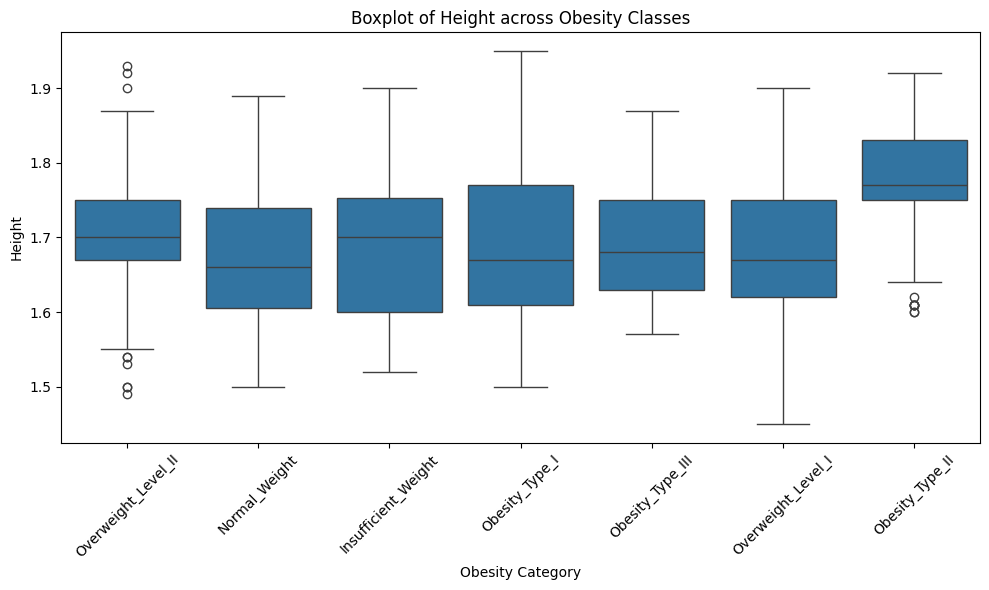

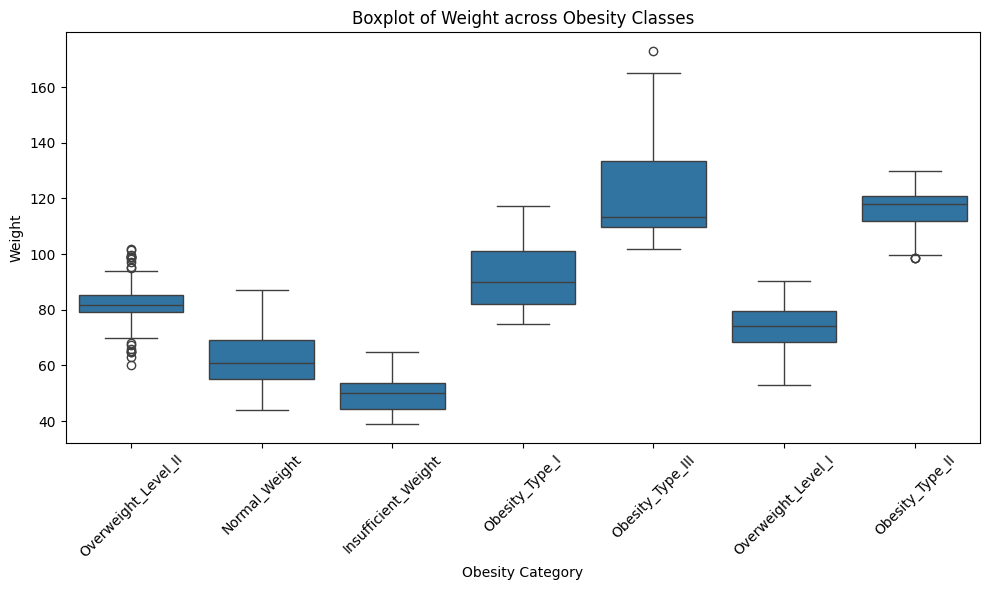

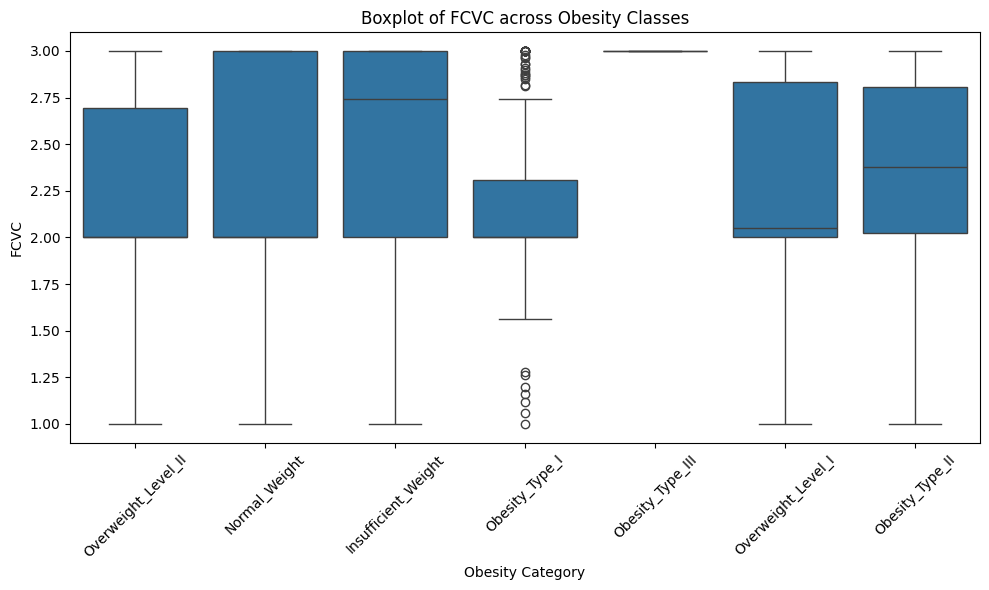

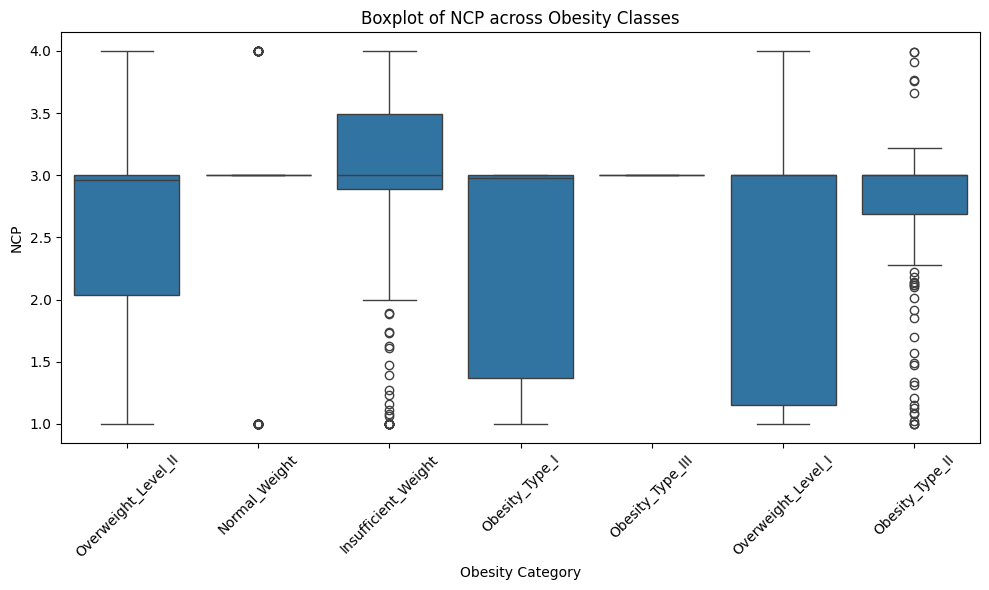

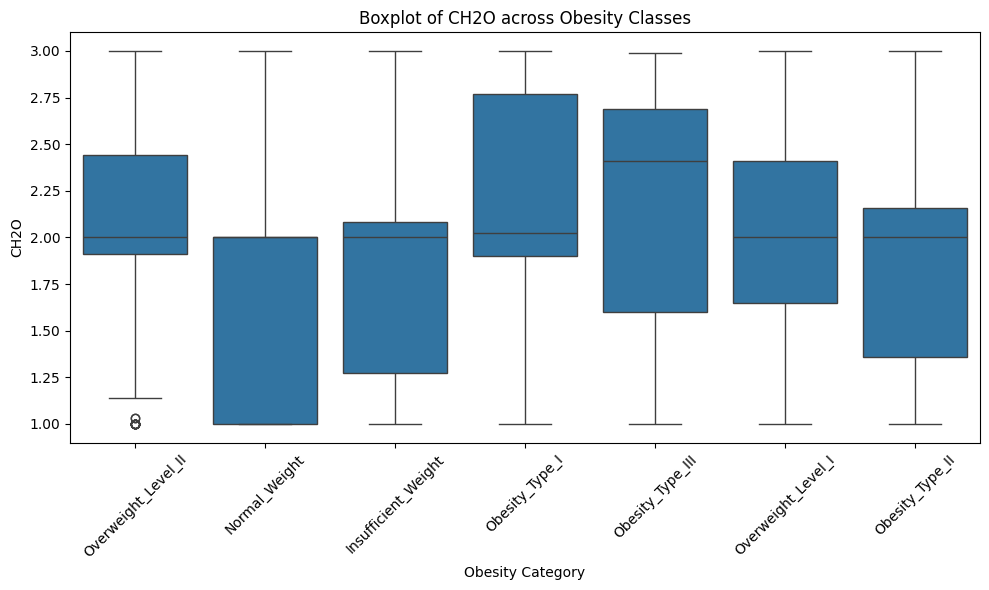

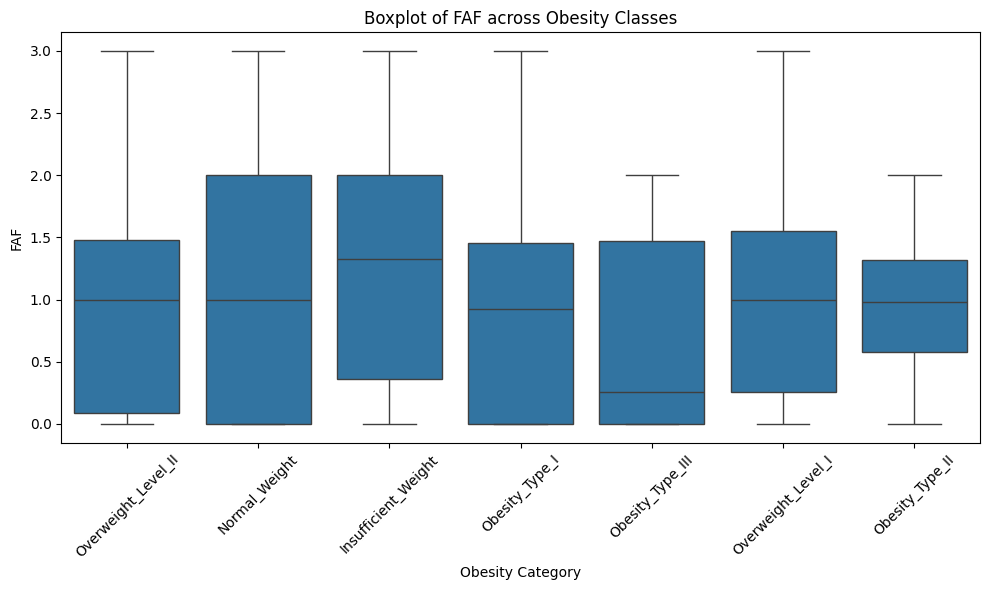

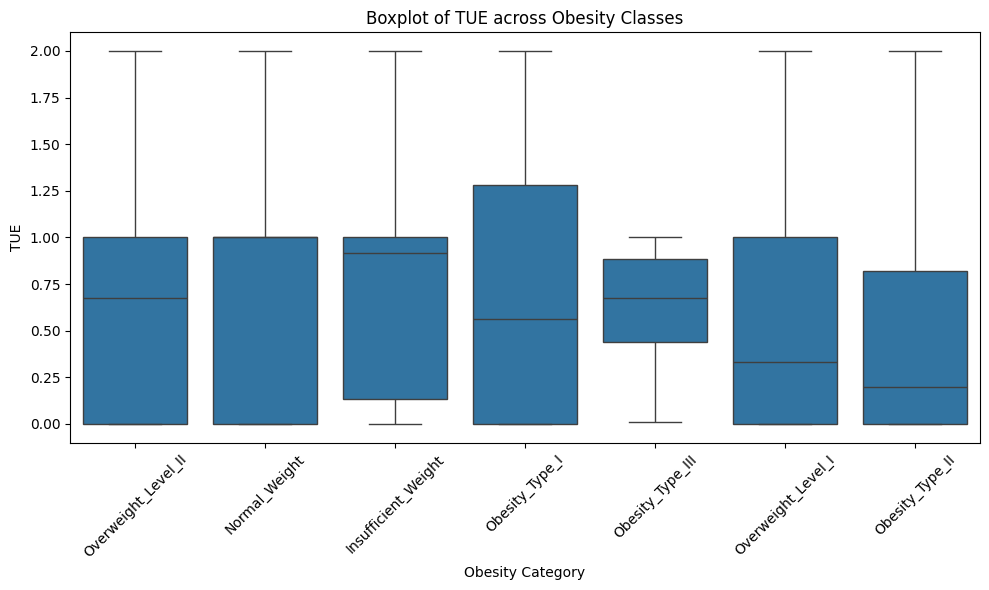

In [6]:
#Boxplot
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='NObeyesdad', y=col, data=df)
    plt.title(f'Boxplot of {col} across Obesity Classes')
    plt.xlabel('Obesity Category')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

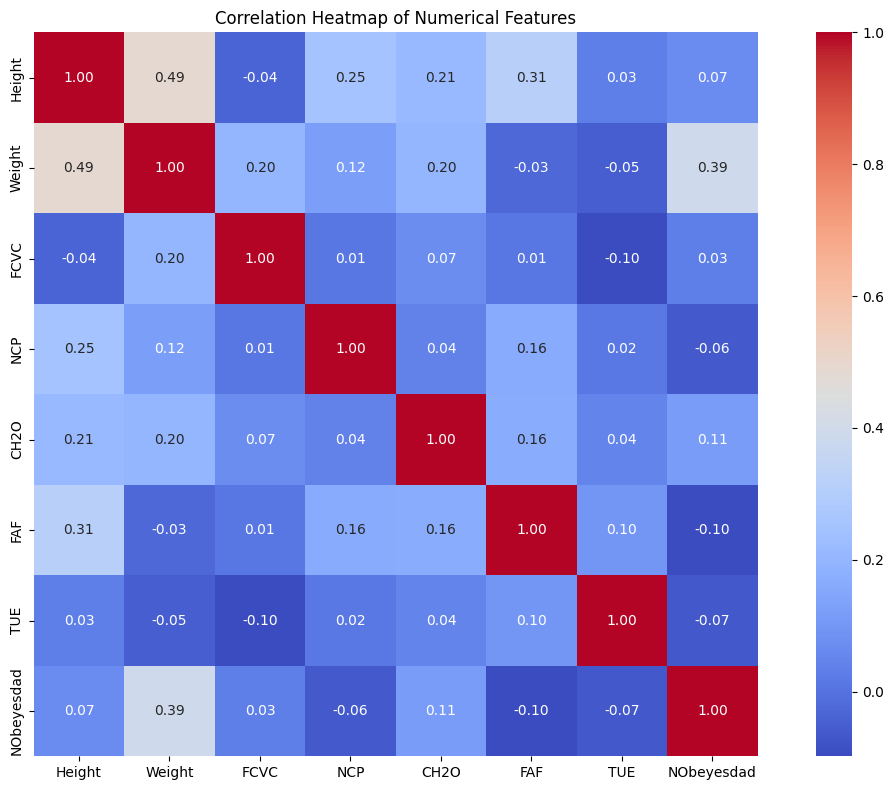

In [18]:
#Heatmap
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [8]:
#Encode Target
target_encoder = LabelEncoder()
df["NObeyesdad"] = target_encoder.fit_transform(df["NObeyesdad"])

#Target and Features
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

In [9]:
#Identify Columns
df_obj = X.select_dtypes(include="object")
df_num = X.select_dtypes(include=["int64", "float64"])
cat_cols = df_obj.columns.tolist()
num_cols = df_num.columns.tolist()

#Transformers
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

#Combine
preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

In [10]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Height', 'Weight', 'FCVC', 'NCP', 'CH2O',
                                  'FAF', 'TUE']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Age',
                                  'family_history_with_overweight', 'FAVC',
                                  'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])])

In [11]:
#Pipelines
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(random_state=42))
])

gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gb", GradientBoostingClassifier(random_state=42))
])

In [13]:
#Data Split
data = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = data

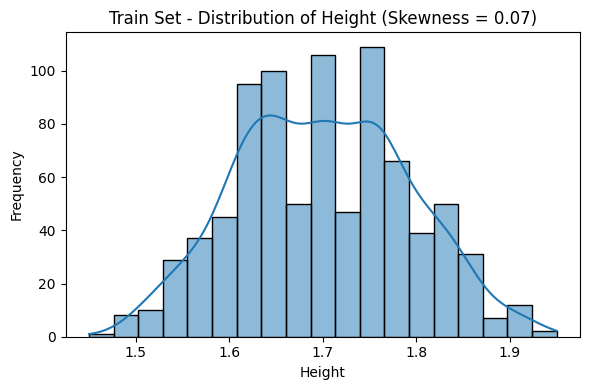

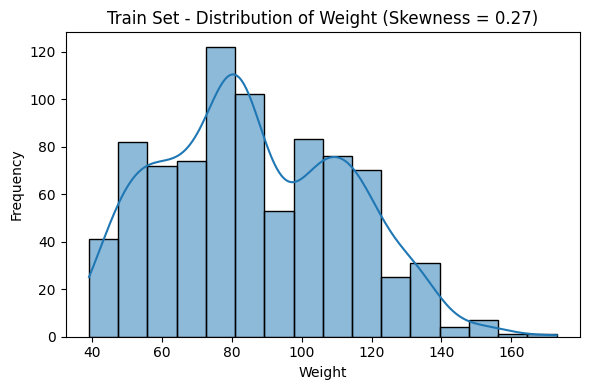

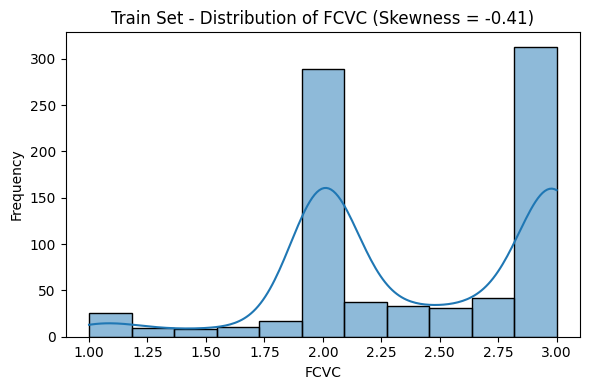

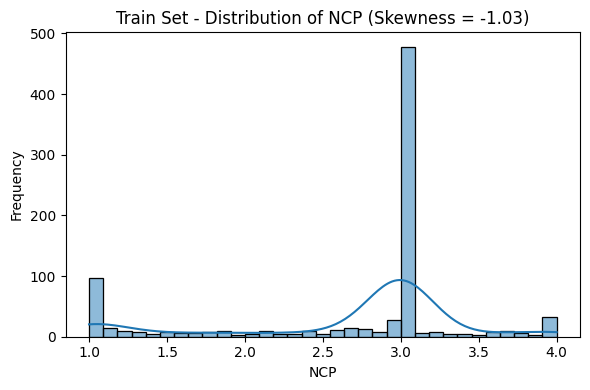

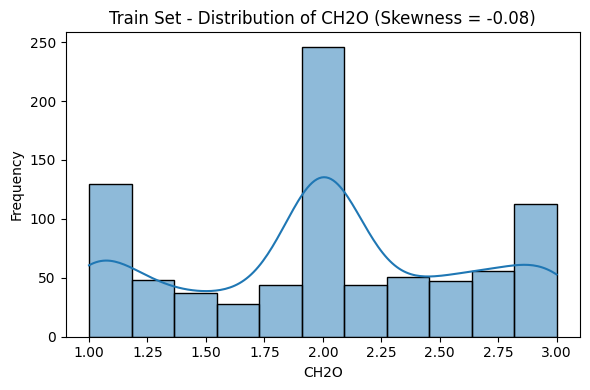

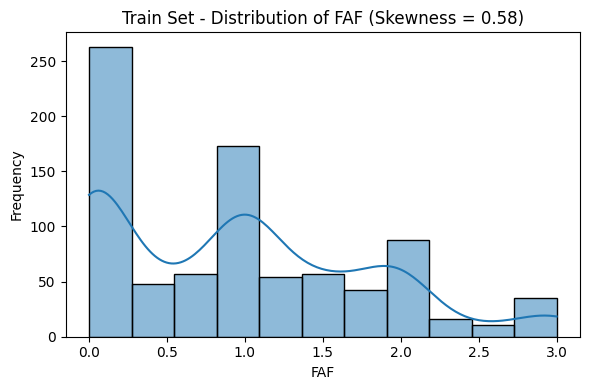

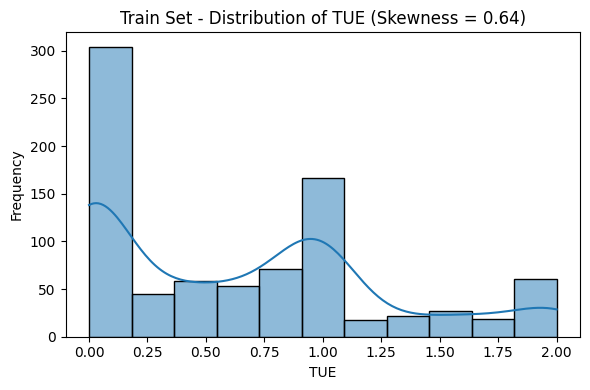

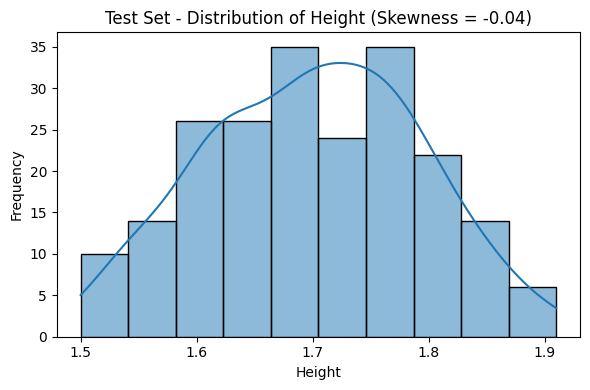

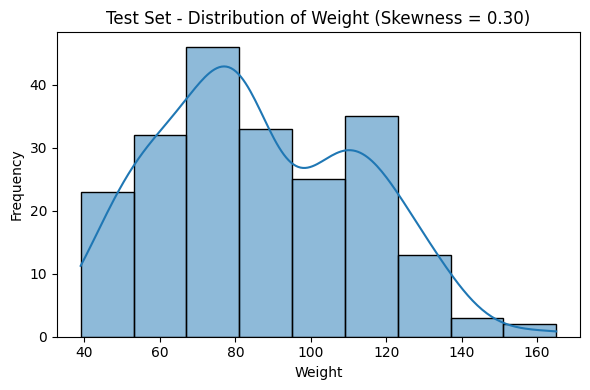

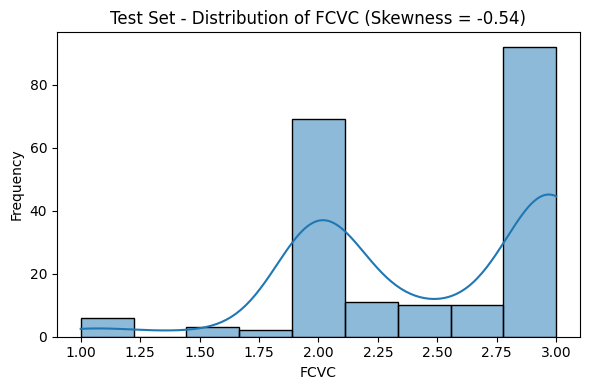

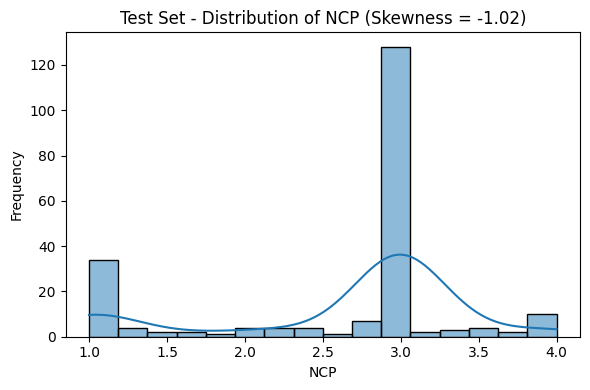

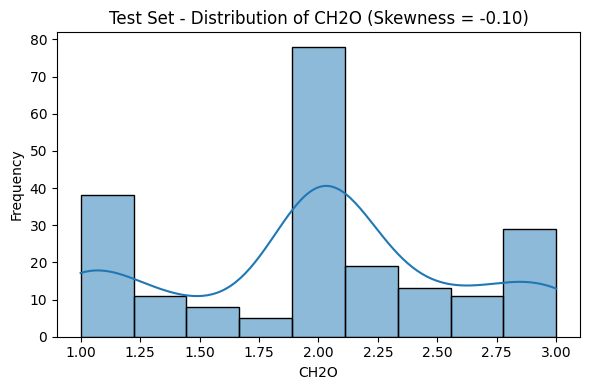

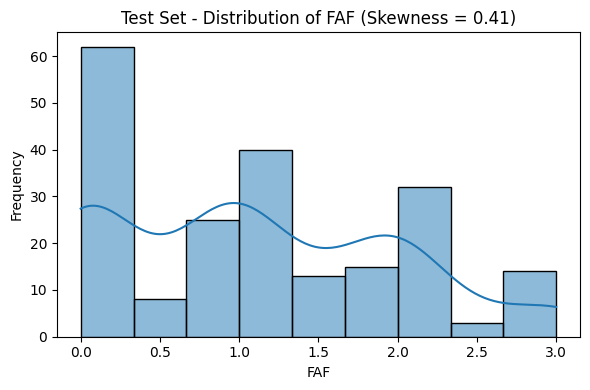

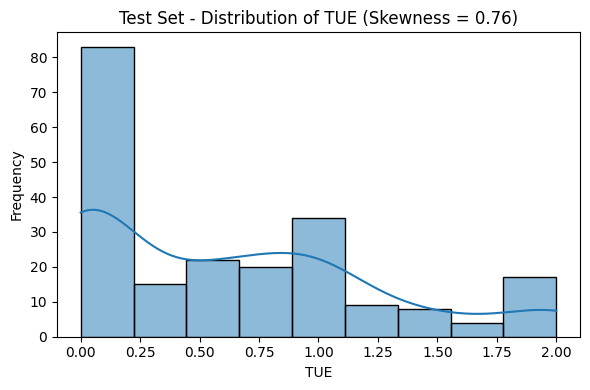

In [14]:
#Skweness
#Train Dataset
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])

for col in X_train_num.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train_num[col], kde=True)
    plt.title(f'Train Set - Distribution of {col} (Skewness = {X_train_num[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#Test Dataset
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])

for col in X_test_num.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_test_num[col], kde=True)
    plt.title(f'Test Set - Distribution of {col} (Skewness = {X_test_num[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [15]:
#Train and Evaluate
rf_pipeline.fit(X_train, y_train)
print("Random Forest:\n", classification_report(y_test, rf_pipeline.predict(X_test)))

gb_pipeline.fit(X_train, y_train)
print("Gradient Boosting:\n", classification_report(y_test, gb_pipeline.predict(X_test)))

Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.78      0.81      0.79        36
           2       0.97      0.94      0.96        34
           3       1.00      0.97      0.99        34
           4       0.97      1.00      0.98        32
           5       0.71      0.77      0.74        26
           6       0.68      0.74      0.71        23

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.86       212
weighted avg       0.88      0.87      0.87       212

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.85      0.81      0.83        36
           2       0.91      0.91      0.91        34
           3       0.97      0.94      0.96        34
           4       1.00      1.00      1.00        32
           5       0.76      0.85      0.8

In [19]:
#Best Model
best_model = gb_pipeline
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("target_encoder.pkl", "wb") as f:
    pickle.dump(target_encoder, f)

print("Model and encoders saved.")

Model and encoders saved.
